In [20]:
import numpy as np
import pandas as pd

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df,df1],ignore_index=True)
# df = df.append(df1,ignore_index=True)

# df = df.sample(40)
df['target'].unique()

array([1, 0])

In [21]:
df.head()
df.isna().sum()

feature1    0
feature2    0
feature3    0
target      0
dtype: int64

In [22]:
print("Unique target values:", df['target'].unique())
print("Number of unique targets:", df['target'].nunique())
print("Target data type:", df['target'].dtype)
print("First few rows:")
print(df[['feature1', 'feature2', 'feature3', 'target']].head(10))

Unique target values: [1 0]
Number of unique targets: 2
Target data type: int64
First few rows:
   feature1  feature2  feature3  target
0  0.666988  0.025813 -0.777619       1
1  0.948634  0.701672 -1.051082       1
2 -0.367548 -1.137460 -1.322148       1
3  1.772258 -0.347459  0.670140       1
4  0.322272  0.060343 -1.043450       1
5 -1.009942  0.441736  1.128877       1
6 -1.838068 -0.938769 -0.201841       1
7  1.045371  0.538162  0.812119       1
8  0.241106 -0.952510 -0.136267       1
9  1.267248  0.173634 -1.223255       1


In [23]:
import plotly.express as px

# Convert target to string first
df['target'] = df['target'].astype(str)

# Then pass column NAMES (strings), not the Series themselves
fig = px.scatter_3d(df, 
                    x='feature1',  # Just the column name
                    y='feature2', 
                    z='feature3',
                    color='target')  # Just the column name

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [24]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [25]:
f1 = df.iloc[:,0] 
f2  = df.iloc[:,1]
f3 = df.iloc[:,2]

In [26]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([f1,f2,f3])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [27]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [28]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [29]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


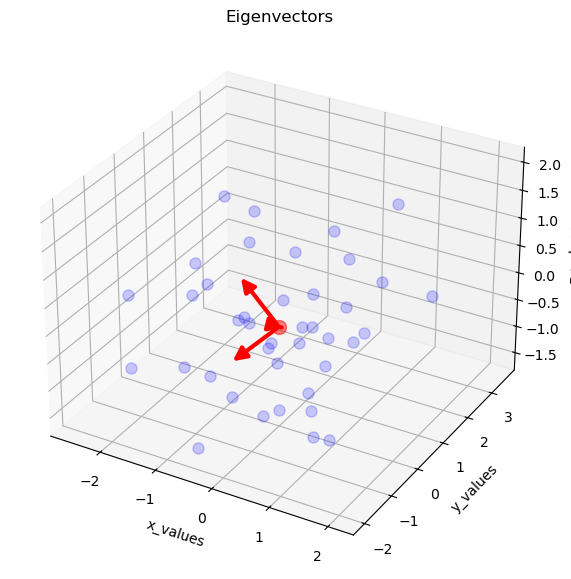

In [34]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        proj = self.axes.get_proj()
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, proj)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        proj = self.axes.get_proj()
        _, _, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, proj)
        return zs.min()


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [35]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [36]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,-0.429384,0.829265,1
1,-1.124520,0.842226,1
2,0.599433,1.795862,1
3,-0.094556,-0.761566,1
4,-0.401542,1.203061,1


In [38]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()